In [2]:
from setup_libs import *

In [1]:
import torch

## 7.3 Двуслойная (многослойная) нейронная сеть

Обозначения
* $x_i$ - вектор i-го объекта
* $x^j_i$ - j-ый элемент, i-го вектора (скаляр)
* $a^m$ - m-ый элемент выходного слоя нейронов

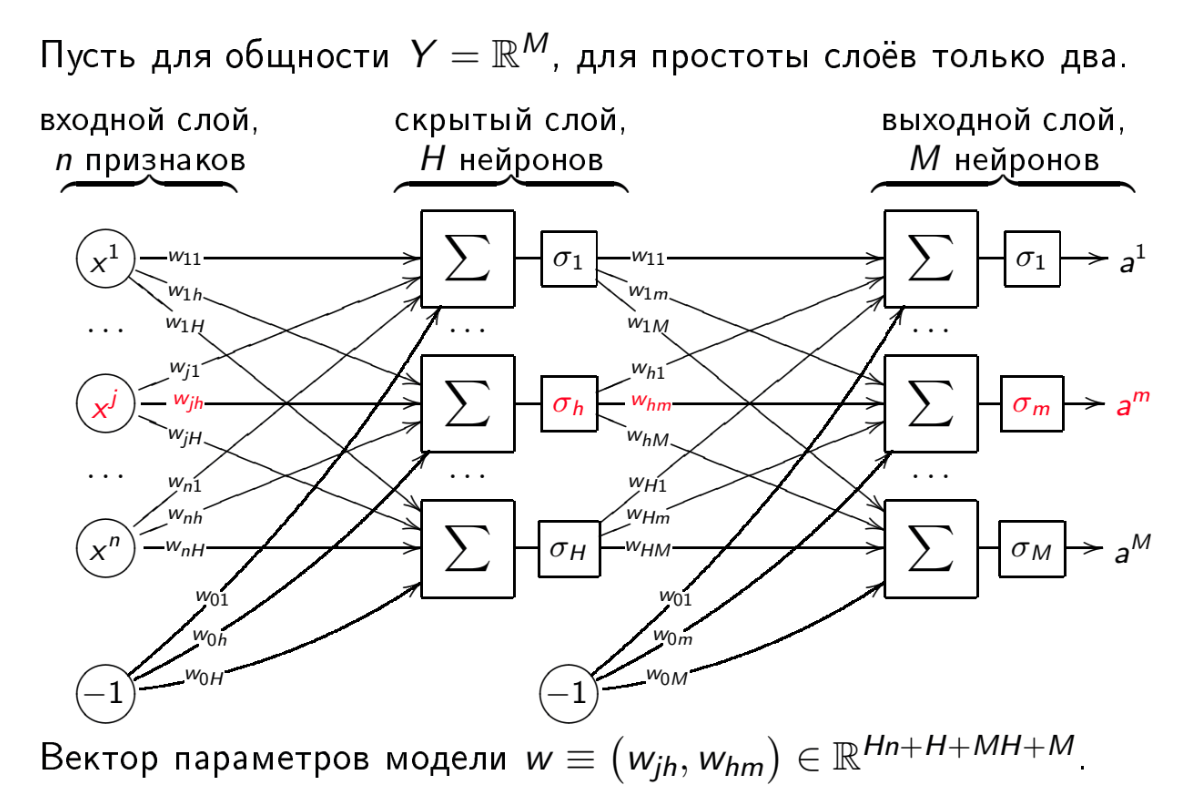

In [8]:
Image('images/2layers.png', width = 600)

Мы собираемся искать параметры **градиентным спуском**. Какая будет ассимптотика данного алгоритма?

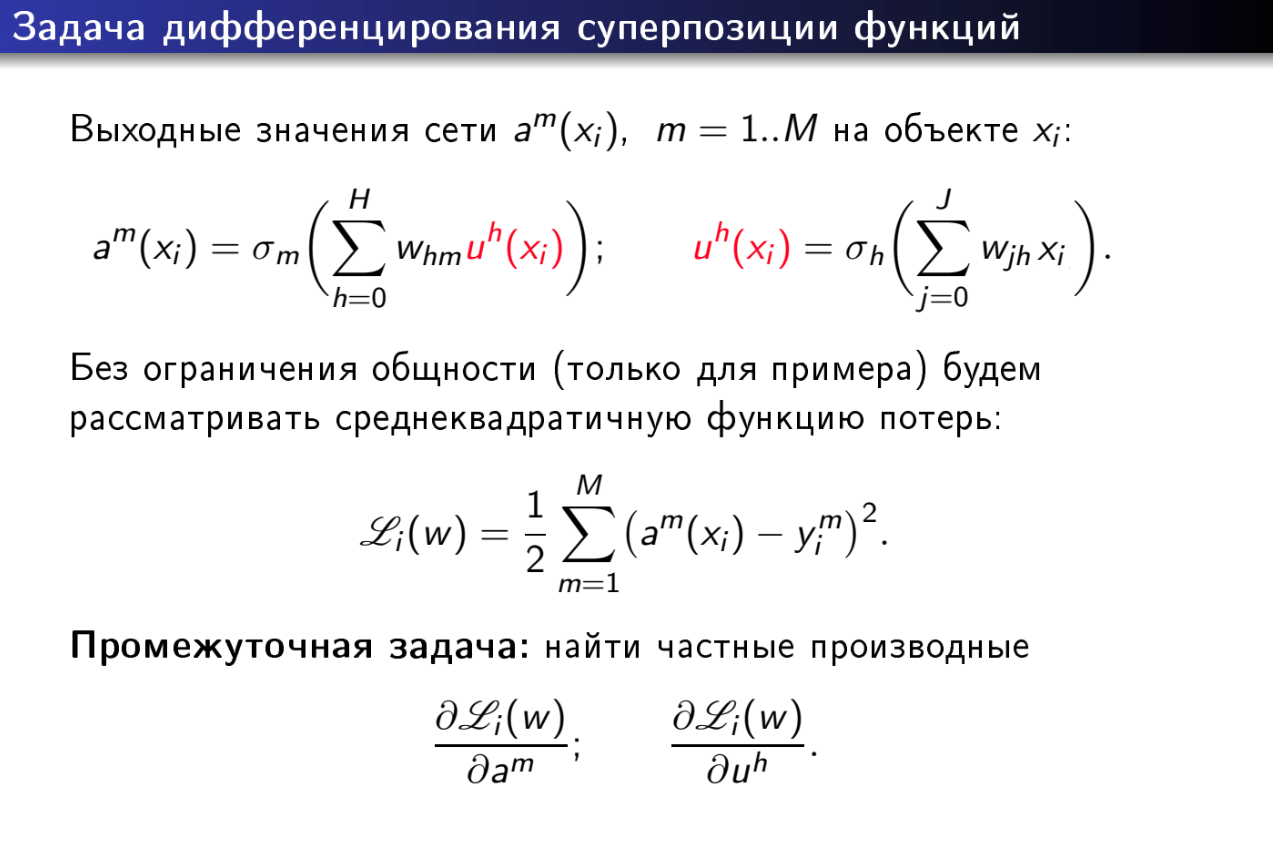

In [13]:
Image('images/diff1.png', width=600)

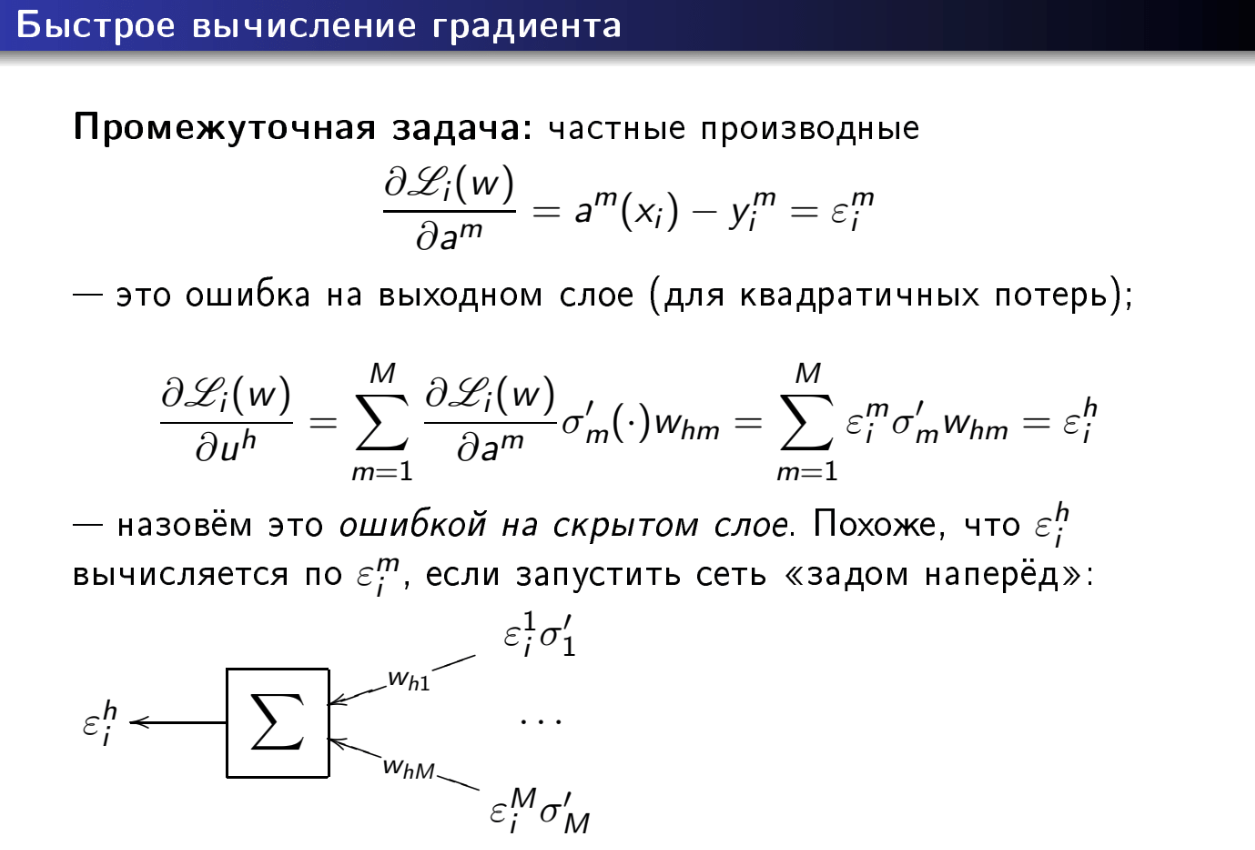

In [10]:
Image('images/diff2.png', width=600)

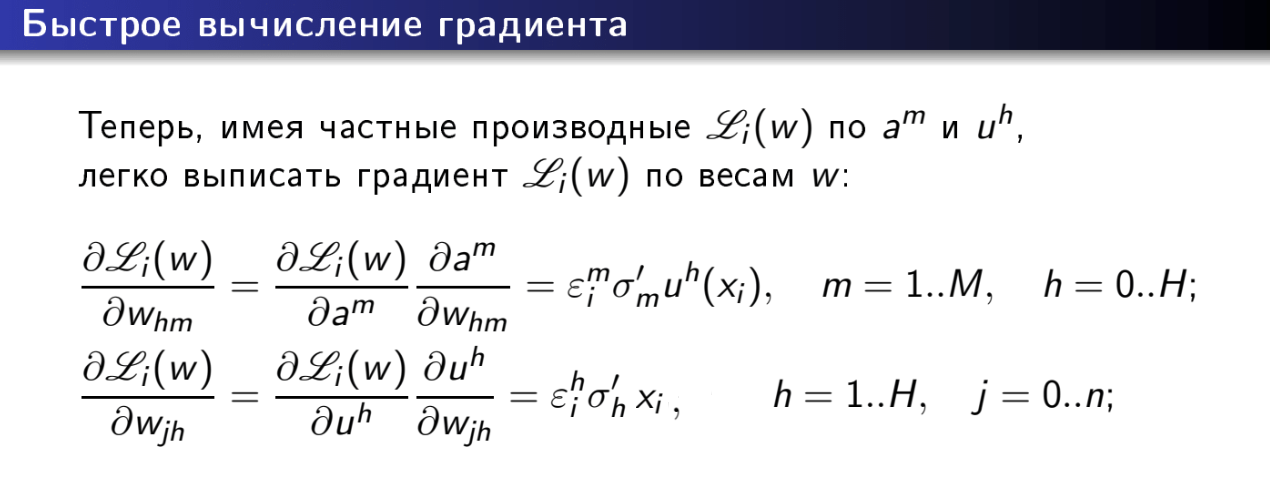

In [16]:
Image('images/diff3.png', width=600)

## 7.3 Алгоритм обратного распространения ошибки

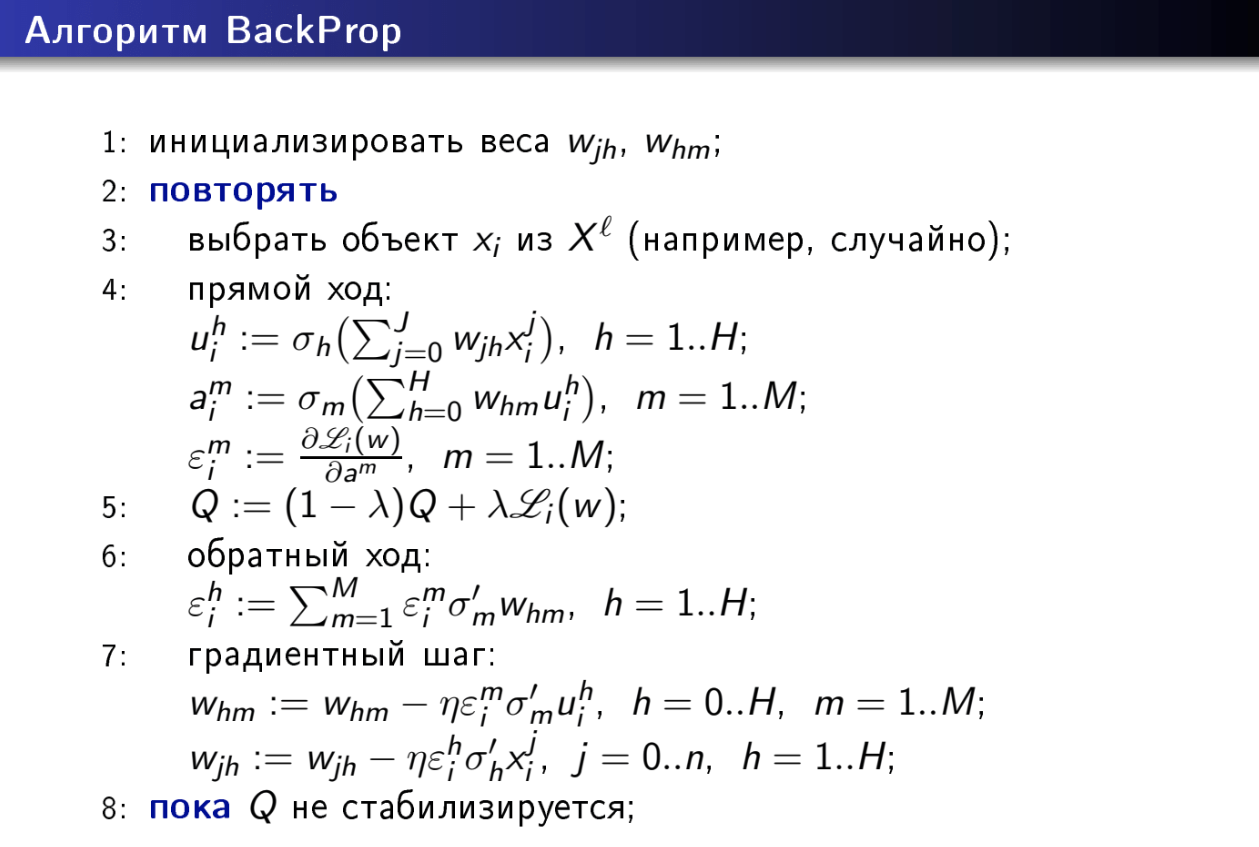

In [15]:
Image('images/backprop.png', width=600)

4. еще посчитать $\sigma_m'$ и $\sigma_h'$

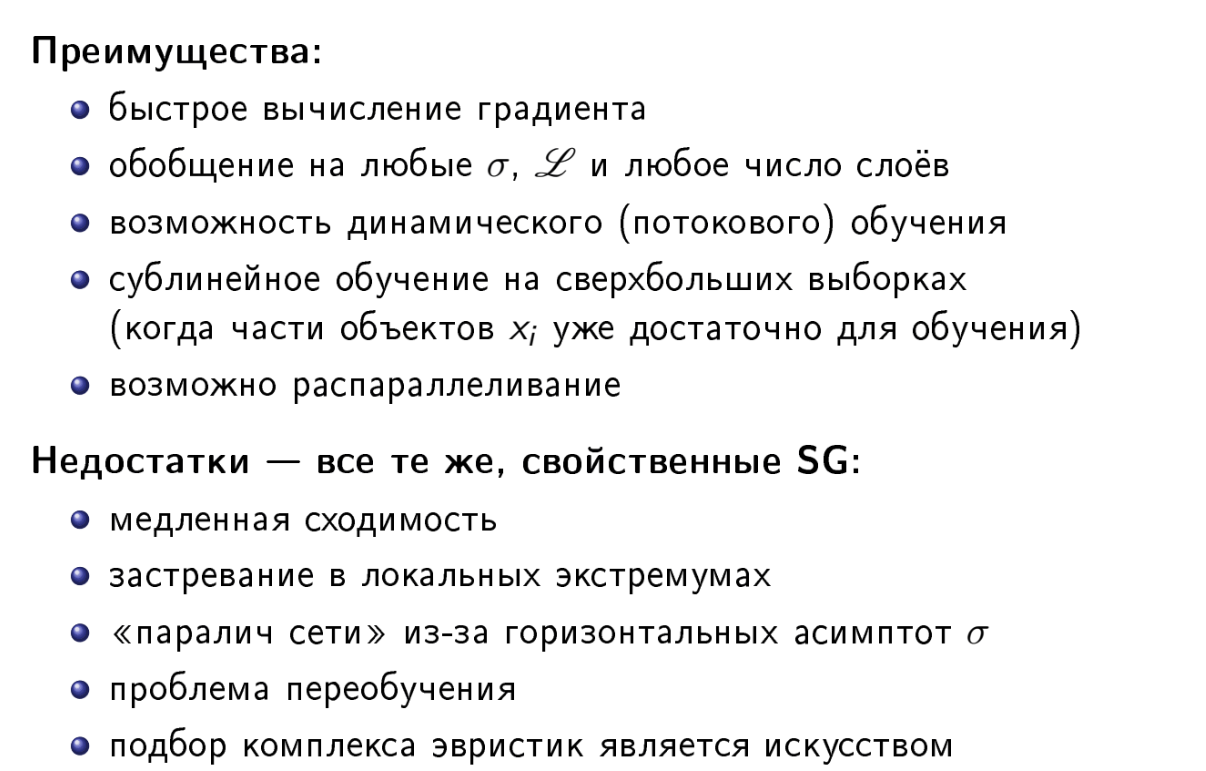

In [19]:
Image('images/plusmin.png', width=600)

99 761.499755859375
199 689.901611328125
299 632.2874755859375
399 570.9910888671875
499 500.9030456542969
599 419.7768859863281
699 329.4848937988281
799 237.17373657226562
899 154.02352905273438
999 90.17689514160156
1099 49.037715911865234
1199 26.64166831970215
1299 16.0726375579834
1399 11.598079681396484
1499 9.84164810180664
1599 9.18533992767334
1699 8.947525024414062
1799 8.86292552947998
1899 8.83315658569336
1999 8.82274055480957


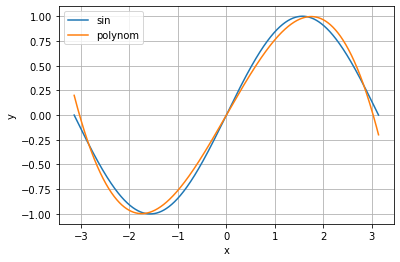

In [6]:
# Подготовили данные 
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Define model
model = torch.nn.Sequential(
    torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 3),
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for it in range(2000):
    # Forward pass: все до последней ноды
    y_pred = model(xx) 

    # Compute loss: финальная нода с лоссом
    loss = loss_fn(y_pred, y)
    if it % 100 == 99:
        print(it, loss.item())

    # Обнулили градиенты с прошлой итерации
    model.zero_grad()    
        
    # Backward pass: просчитали градиенты назад
    loss.backward()

    # Update the weights using gradient descent. 
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

            

# просто рисовалка   
# а вот тут формулы не существует :))
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, model(xx).detach().numpy(), label='polynom')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()

In [10]:
for param in model.parameters():
    print(param.grad)

tensor([[-3.9487,  0.4222,  1.0689],
        [-0.5018,  0.0537,  0.1358],
        [ 1.1116, -0.1189, -0.3009]])
tensor([-0.3982, -0.0506,  0.1121])
tensor([[ 2.1943, -0.2324, -0.7495],
        [-1.4019,  0.1485,  0.4789],
        [-3.5260,  0.3733,  1.2045]])
tensor([ 0.2313, -0.1478, -0.3716])
tensor([[ 2.0951, -0.1867, -3.6592]])
tensor([-0.4669])


In [27]:
print(model)

Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Flatten(start_dim=0, end_dim=1)
)


## А зачем функция активации?

torch.Size([2000, 2])
torch.Size([2000, 1])


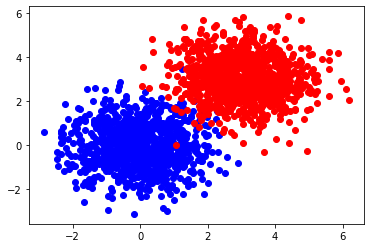

In [32]:
X1 = torch.randn(1000, 2, dtype = torch.float)
X2 = torch.randn(1000, 2, dtype = torch.float) + 3
X = torch.cat([X1, X2], dim=0)
Y1 = torch.zeros(1000, 1)
Y2 = torch.ones(1000, 1)
Y = torch.cat([Y1, Y2], dim=0)
print(X.size())
print(Y.size())

plt.scatter(X1[:, 0], X1[:, 1], color='b')
plt.scatter(X2[:, 0], X2[:, 1], color='r')

In [33]:
X

tensor([[-0.8540, -1.9525],
        [ 1.2721,  1.9324],
        [ 0.6597, -1.3713],
        ...,
        [ 3.4277,  3.9304],
        [ 2.7326,  1.7304],
        [ 2.3361,  2.9438]])

In [47]:
# сменили модель
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
    torch.nn.Sigmoid(),
    torch.nn.Flatten(0,1)
)

# сменили лосс
criterion = torch.nn.BCELoss()

# Выбоали алгоритм оптимизации
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for it in range(2000):
    # Forward pass: все до последней ноды
    y_pred = model(X) 
    # Compute loss: финальная нода с лоссом
    print(y_pred.shape)
    print(Y.reshape(-1).shape)
    
    loss = loss_fn(y_pred.float(), Y.reshape(-1).long())
    if it % 100 == 99:
        print(it, loss.item())

    #Обнулили градиенты
    optimizer.zero_grad()

    # Посчитали градиенты
    loss.backward()

    # Пересчитываем веса
    optimizer.step()

            

torch.Size([2000])
torch.Size([2000])


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

# Полезные ссылки
* [Видео по алгоритму](https://www.youtube.com/watch?v=tIeHLnjs5U8)
* [Методичка Воронцова по нейронкам](http://ultra27.ccas.ru/voron/download/NeuralNets.pdf)
* [Видос Воронцова, откуда взяты слайды](https://www.youtube.com/watch?v=zbdgUZAzfQg&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=13)
* [Анимации градиентных спусков](http://www.denizyuret.com/2015/03/alec-radfords-animations-for.html)
* [Про softmax](https://konstantinklepikov.github.io/2019/06/27/cs2131n-sofrmax.html)
* [Softmax better than Normalization](https://stackoverflow.com/questions/17187507/why-use-softmax-as-opposed-to-standard-normalization)
